##Data Loading and Preprocessing

## Dependancies

In [ ]:
import numpy as np
import pandas as pd


## Load CSV File
- Import data
- Check data type
- Check for null values

In [ ]:
raw_df = pd.read_csv('https://raw.githubusercontent.com/SRIPATHIB9/PDS/refs/heads/main/lending_data.csv')


##Quick overview of the data

In [ ]:
print(raw_df.shape)
display(raw_df.head())
raw_df.info()
raw_df.describe(include='all')


(77536, 8)


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [ ]:
TARGET   = 'loan_status'
num_cols = [
    'loan_size',
    'interest_rate',
    'borrower_income',
    'debt_to_income',
    'num_of_accounts',
    'derogatory_marks',
    'total_debt'
]
all=[TARGET]+num_cols


## **Data Cleaning**

####MISSING VALUES INDENTIFICATION AND HANDLING

In [ ]:
raw_df.isnull().sum()

,0
loan_size,0
interest_rate,0
borrower_income,0
debt_to_income,0
num_of_accounts,0
derogatory_marks,0
total_debt,0
loan_status,0


NO NULL VAUES IN THE DATA

##Data Visualization

###Outlier detection and removal

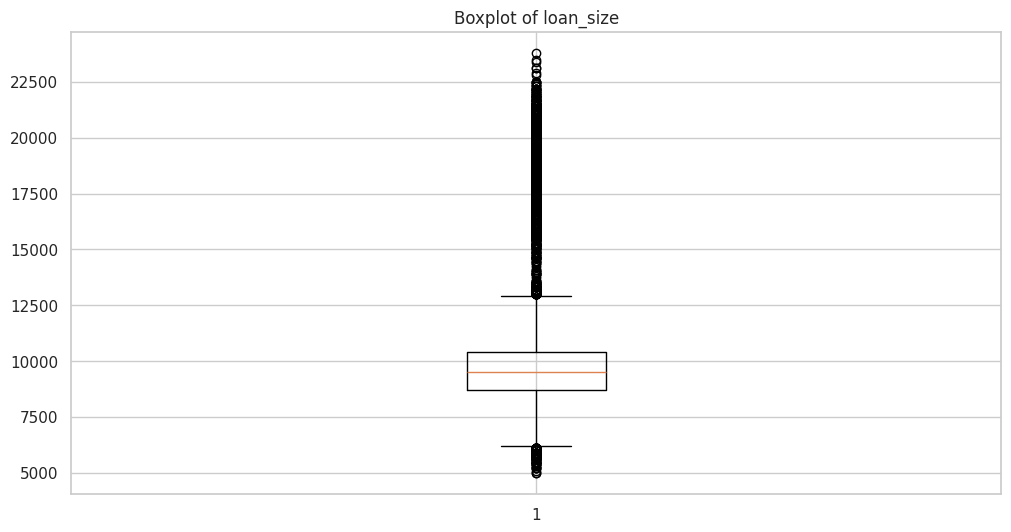

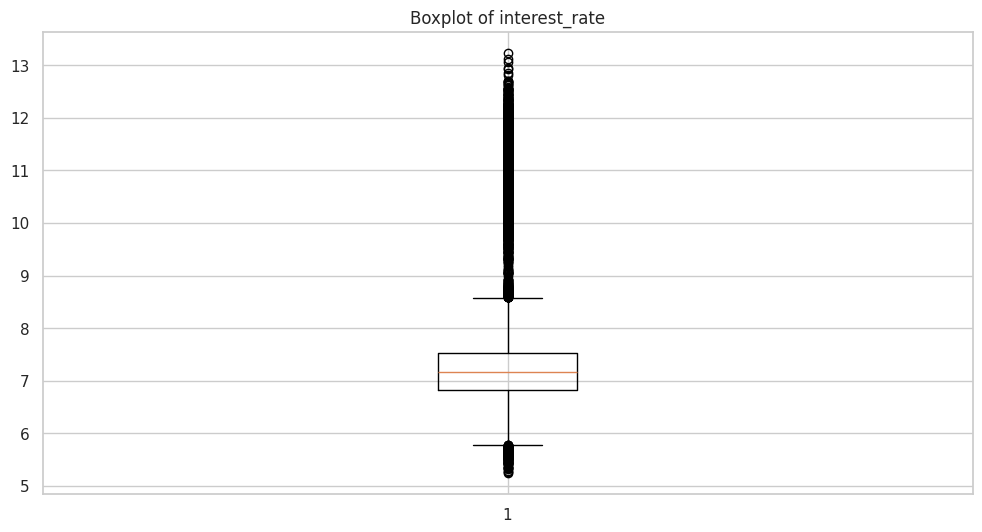

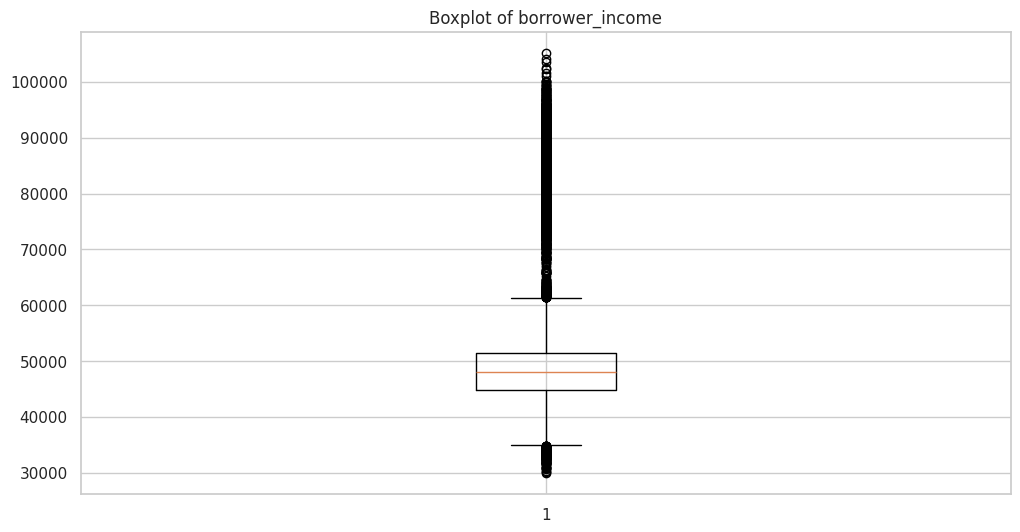

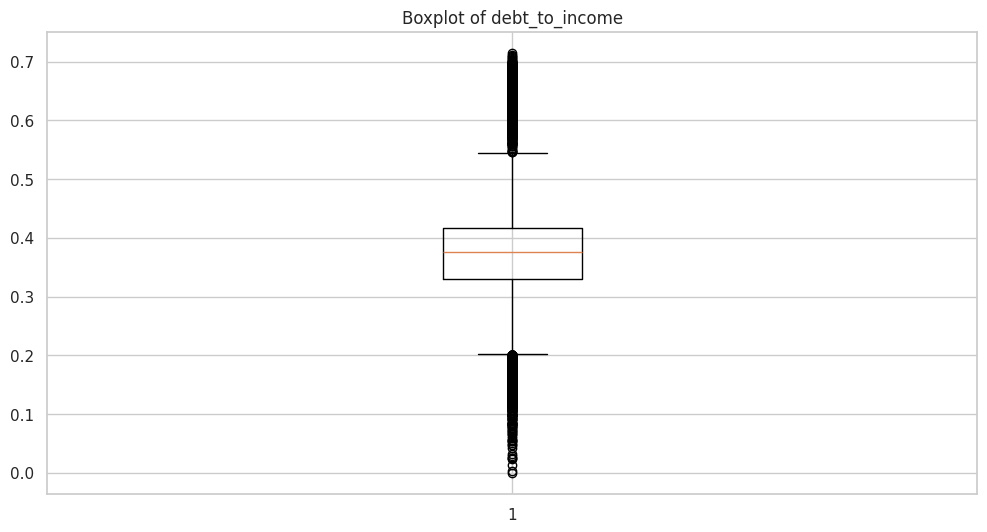

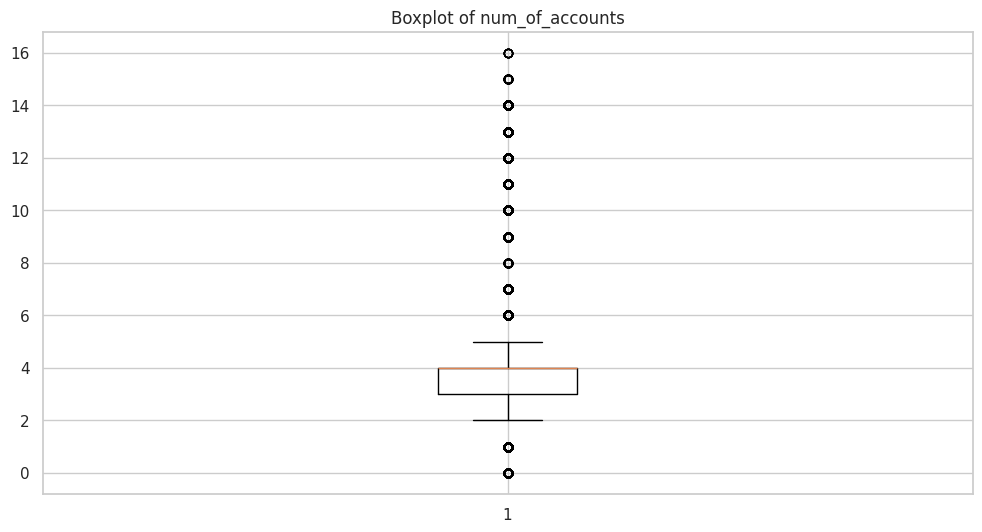

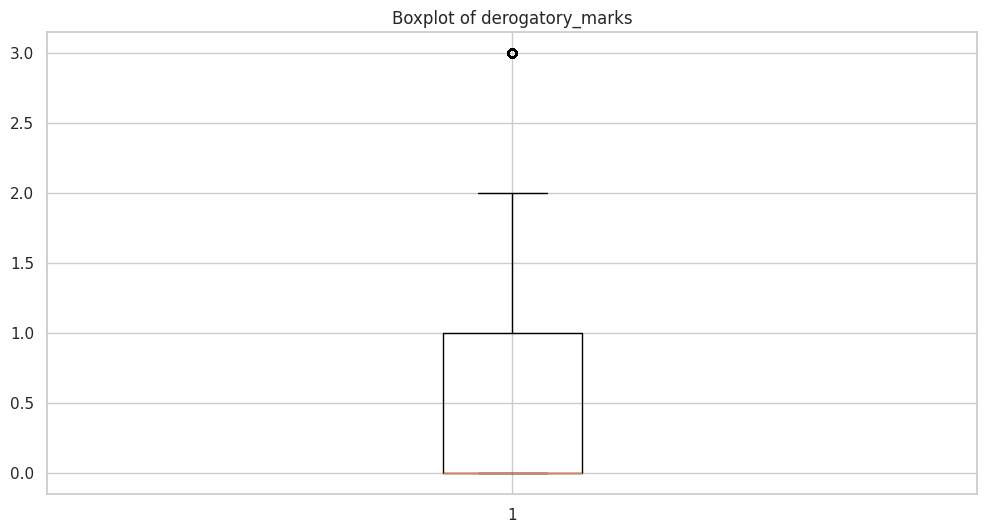

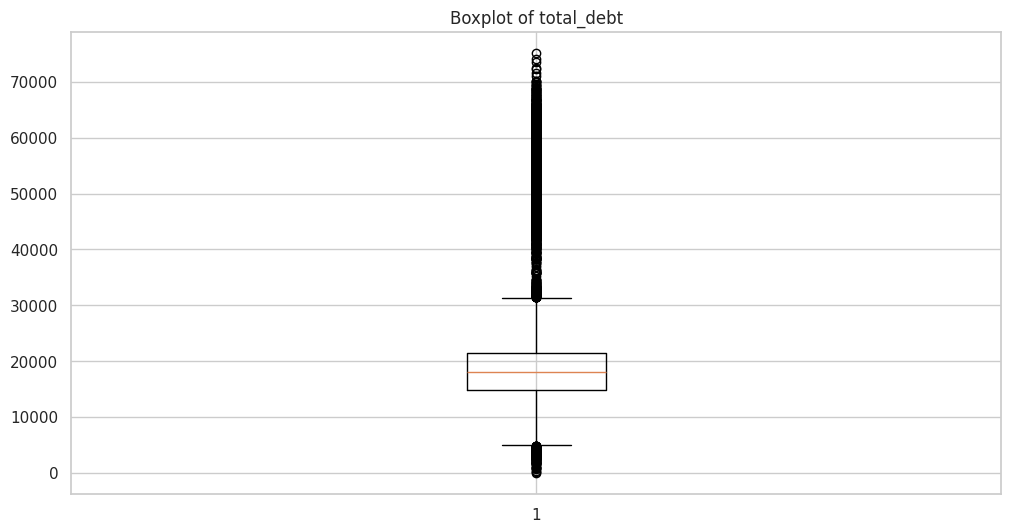

In [ ]:
import matplotlib.pyplot as plt

# 1) Global default
plt.rcParams['figure.figsize'] = (12, 6)    # width=12", height=6"
plt.rcParams['figure.dpi'] = 100            # make it crisp
plt.rcParams['font.size'] = 14              # bigger labels

for col in num_cols:
    plt.figure()                            # now this is 12×6"
    plt.boxplot(raw_df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.show()


###After outlier removal

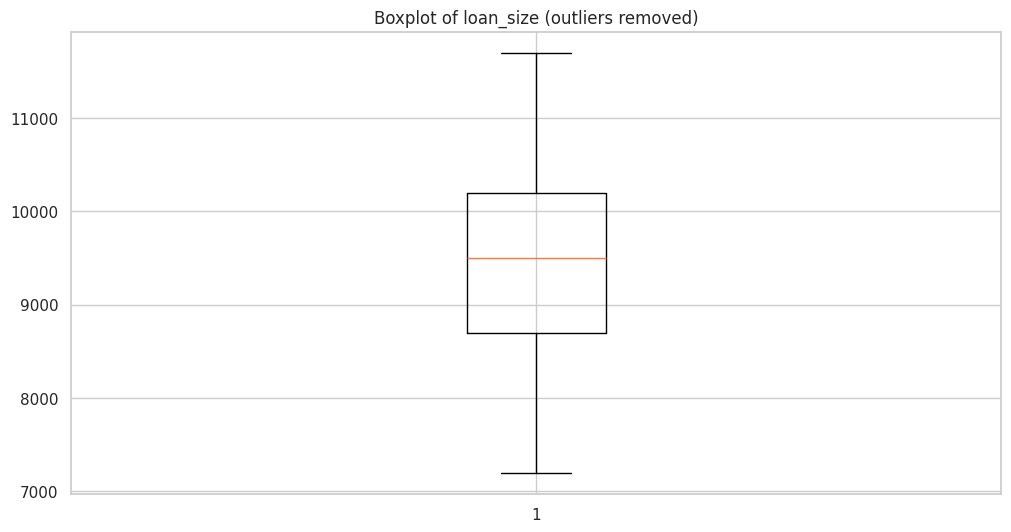

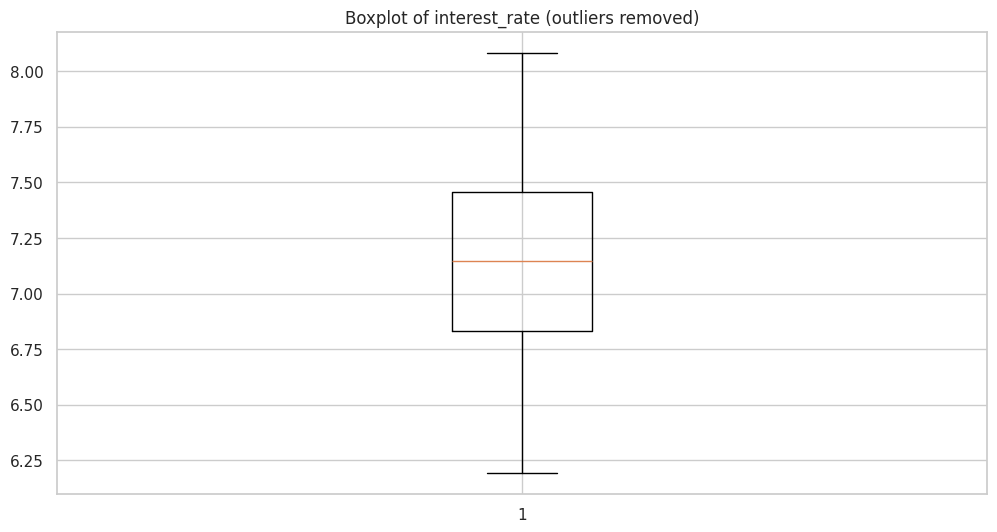

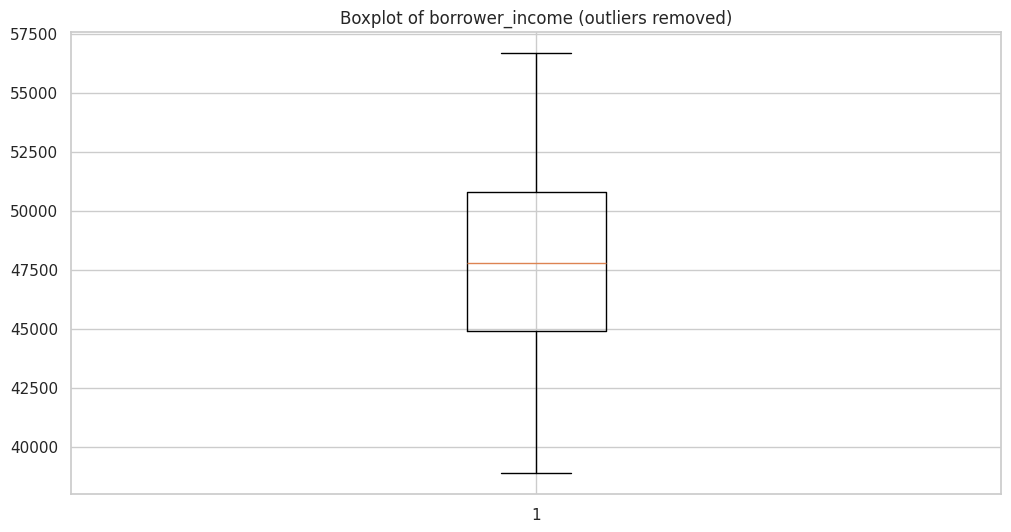

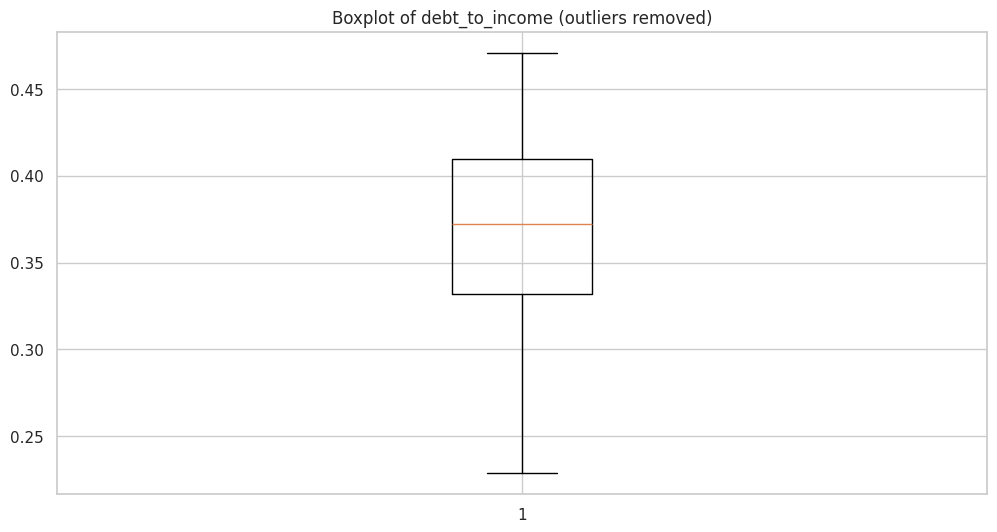

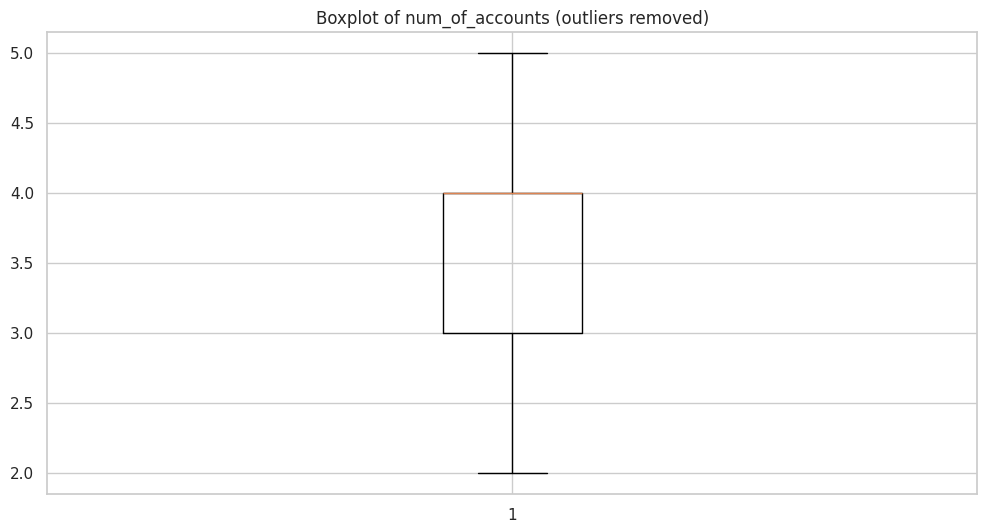

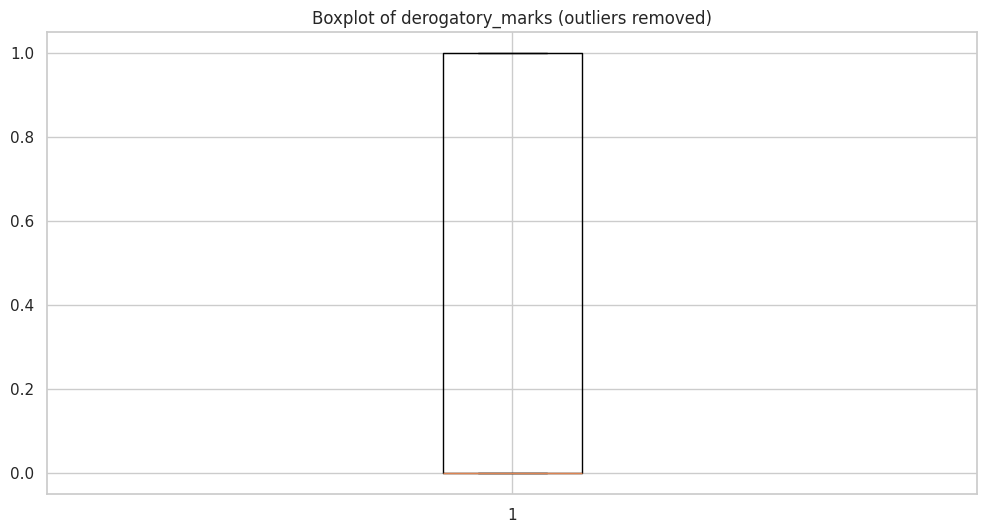

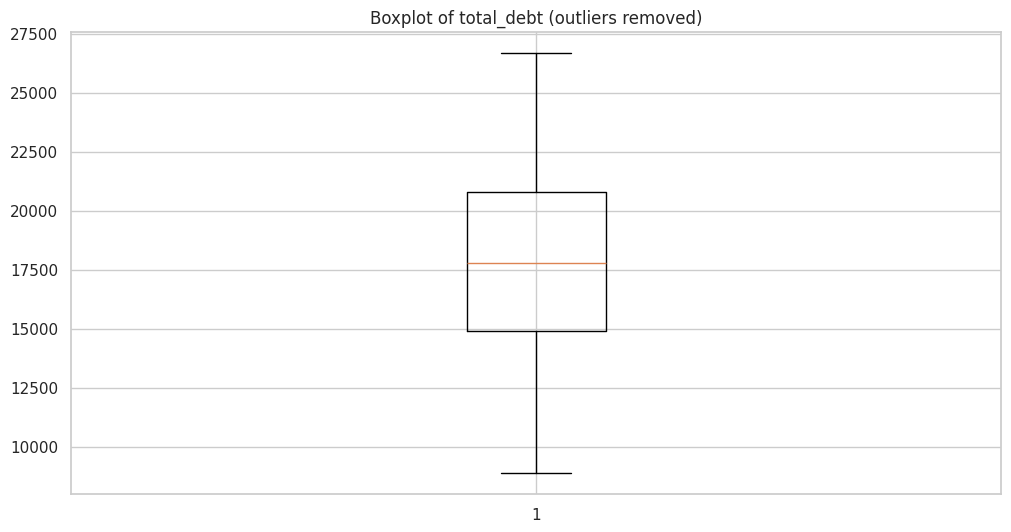

In [ ]:
# 1. Build a mask for each column, then combine
masks = []
for col in num_cols:
    Q1 = raw_df[col].quantile(0.25)
    Q3 = raw_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    masks.append(raw_df[col].between(lower, upper))

# keep only rows that are in‐range for *all* num_cols
df = raw_df[np.logical_and.reduce(masks)]

# 2. Re-plot without those outliers
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 14

for col in num_cols:
    plt.figure()
    plt.boxplot(df[col].dropna())
    plt.title(f'Boxplot of {col} (outliers removed)')
    plt.show()


#Univariate Analysis

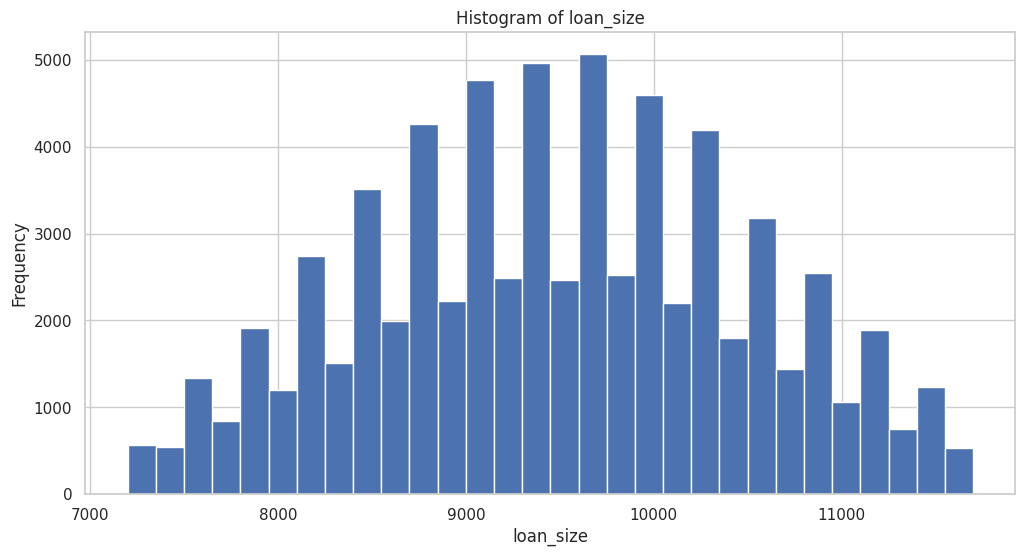

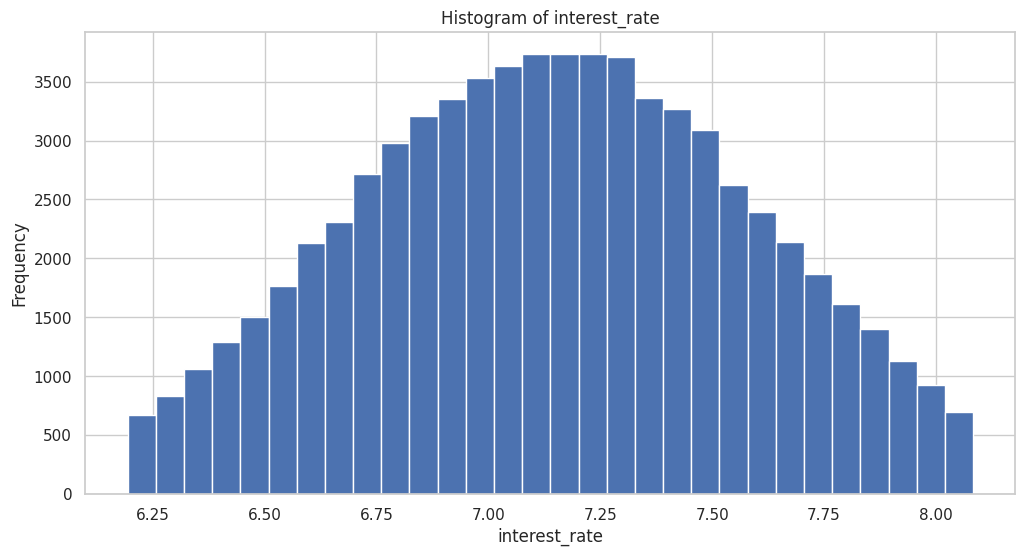

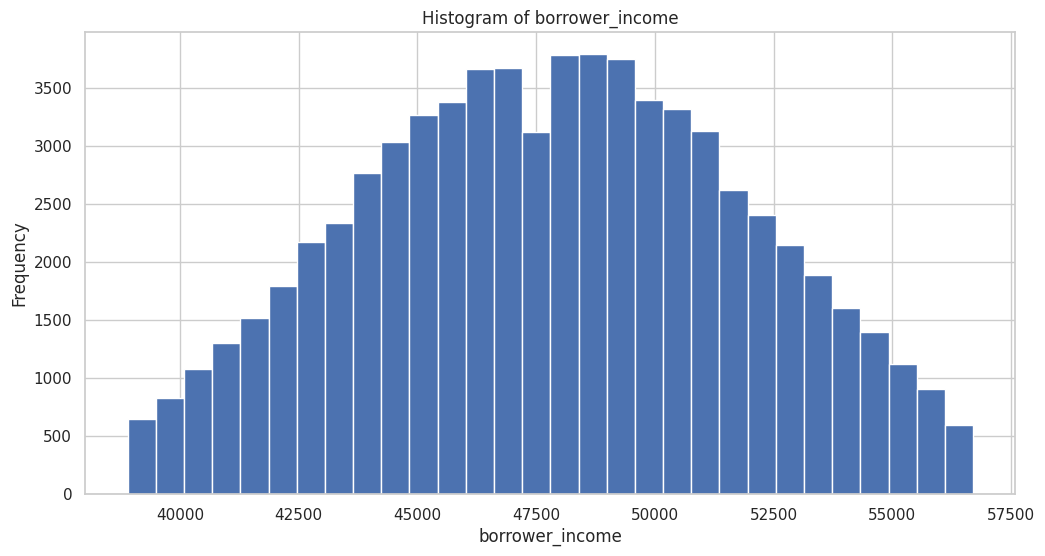

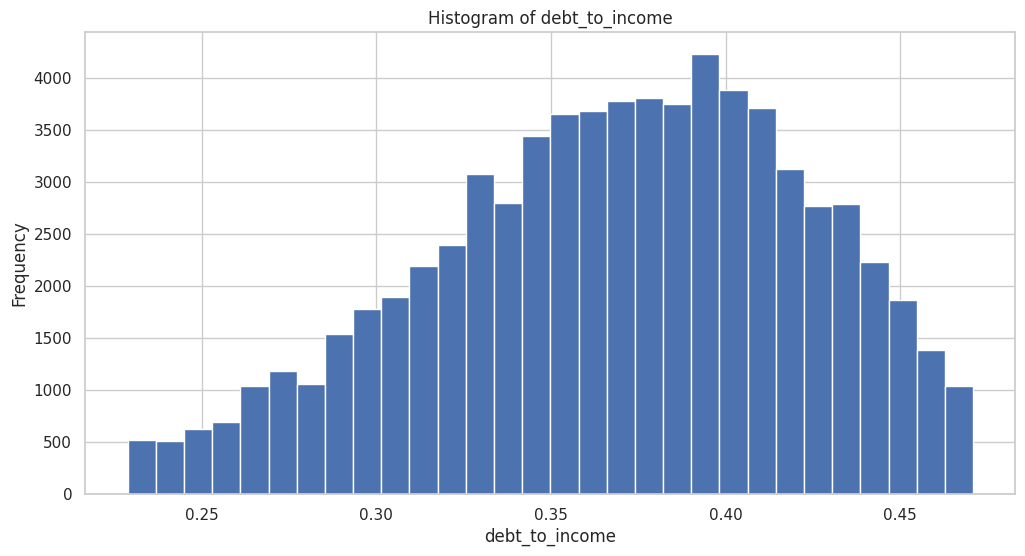

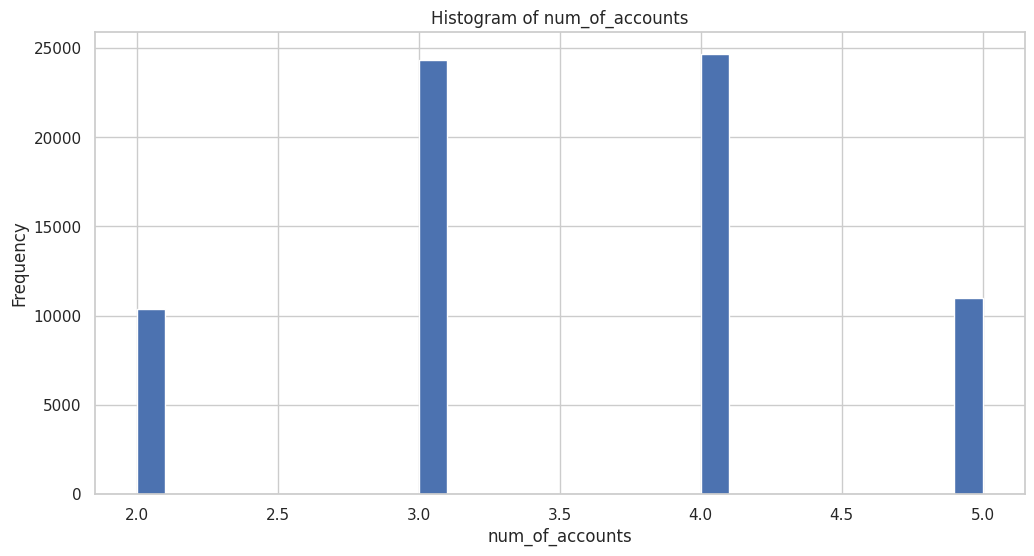

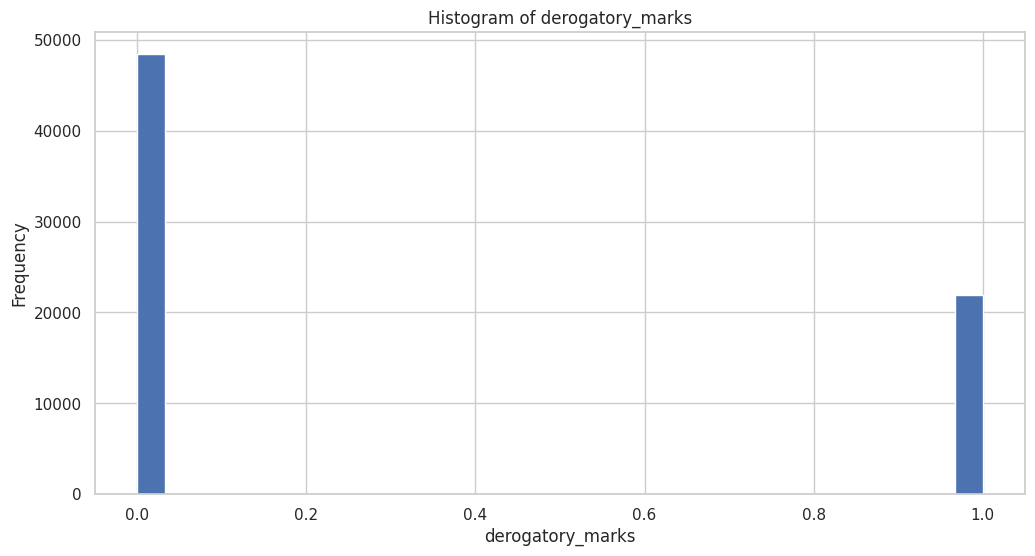

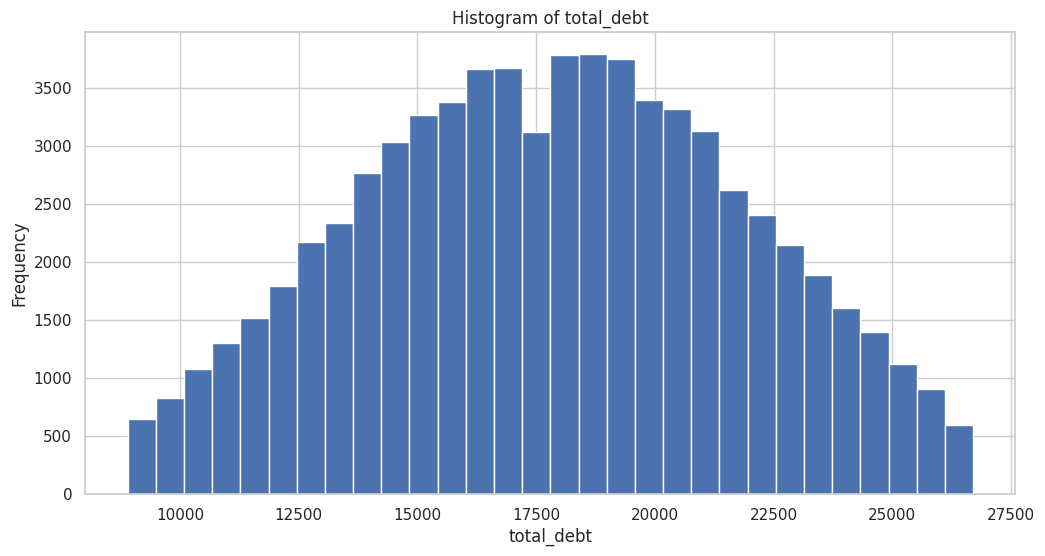

In [ ]:
for col in num_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

#Bivariate Analysis


**Correlation matrix + heatmap**

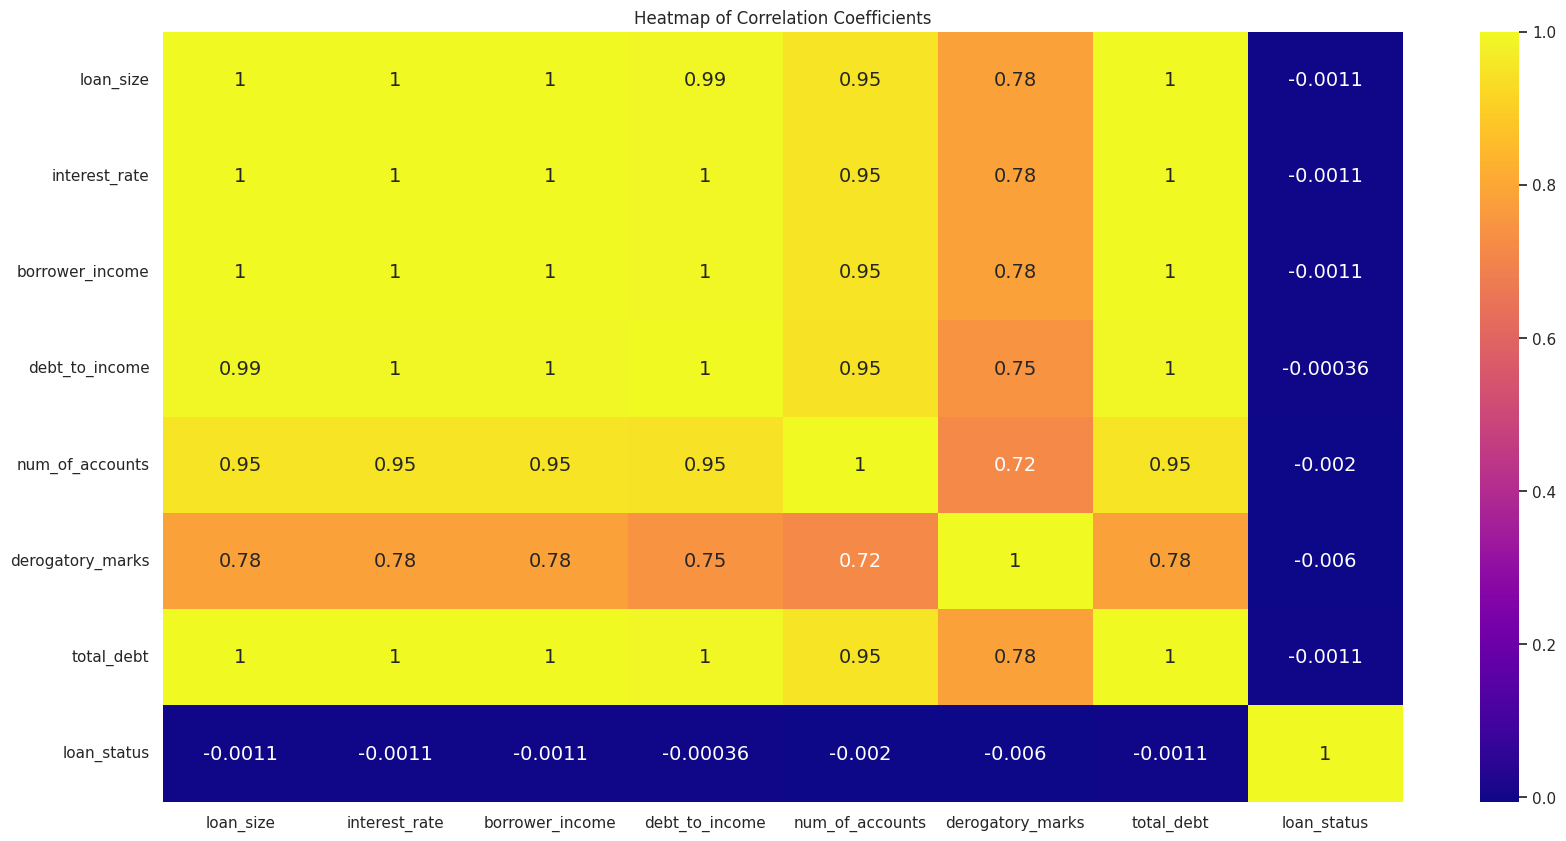

In [ ]:
# Heat Map
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', cbar=True)
plt.title('Heatmap of Correlation Coefficients')
plt.show()

##Target Variable Distribution & handling Class‐Imbalance

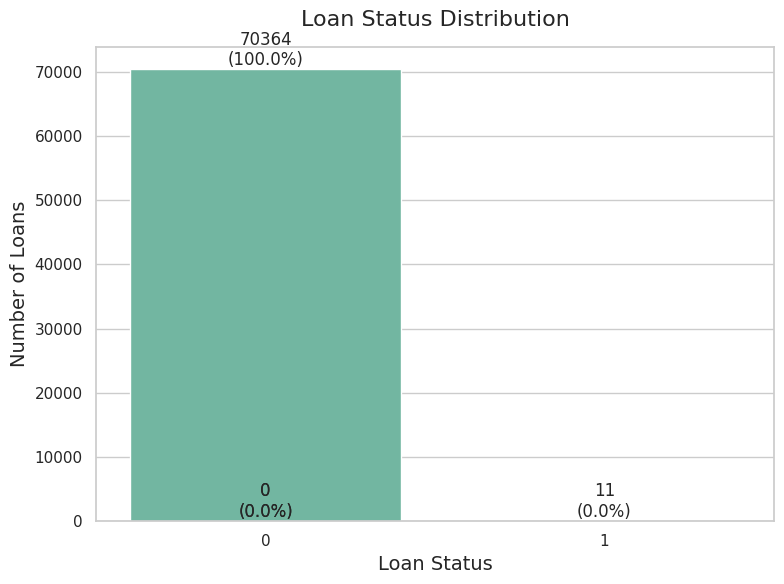

,count
loan_status,
0,70364
1,11


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
total = len(df)

plt.figure(figsize=(8, 6), dpi=100)
ax = sns.countplot(
    x=TARGET,
    hue=TARGET,            # assign your x variable to hue
    data=df,
    palette="Set2",
    dodge=False            # so bars don’t split
)

# remove the redundant legend
if ax.get_legend():
    ax.get_legend().remove()


# annotate counts & percentages
for p in ax.patches:
    count = int(p.get_height())
    pct = 100 * count / total
    ax.annotate(
        f"{count}\n({pct:.1f}%)",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center", va="bottom",
        fontsize=12
    )

ax.set_xlabel("Loan Status", fontsize=14)
ax.set_ylabel("Number of Loans", fontsize=14)
ax.set_title("Loan Status Distribution", fontsize=16, pad=15)
plt.tight_layout()
plt.show()


df[TARGET].value_counts()

#BALANCING THE DATA

In [ ]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']
print("Original Shape of X:", X.shape)
print("Original Shape of y:", y.shape)
print("\nOriginal class distribution:\n", y.value_counts())

Original Shape of X: (70375, 7)
Original Shape of y: (70375,)

Original class distribution:
 loan_status
0    70364
1       11
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split # import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
#Combined (SMOTE + Undersampling) for balancing
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_balanced, y_balanced = smt.fit_resample(X_train, y_train)

#After balancing the final data

In [ ]:

print("Resampled Shape of X:", X_balanced.shape)
print("Resampled Shape of y:", y_balanced.shape)
print("\nResampled class distribution:\n", y_balanced.value_counts())


Resampled Shape of X: (112582, 7)
Resampled Shape of y: (112582,)

Resampled class distribution:
 loan_status
0    56291
1    56291
Name: count, dtype: int64


#Feature comparision with target variable

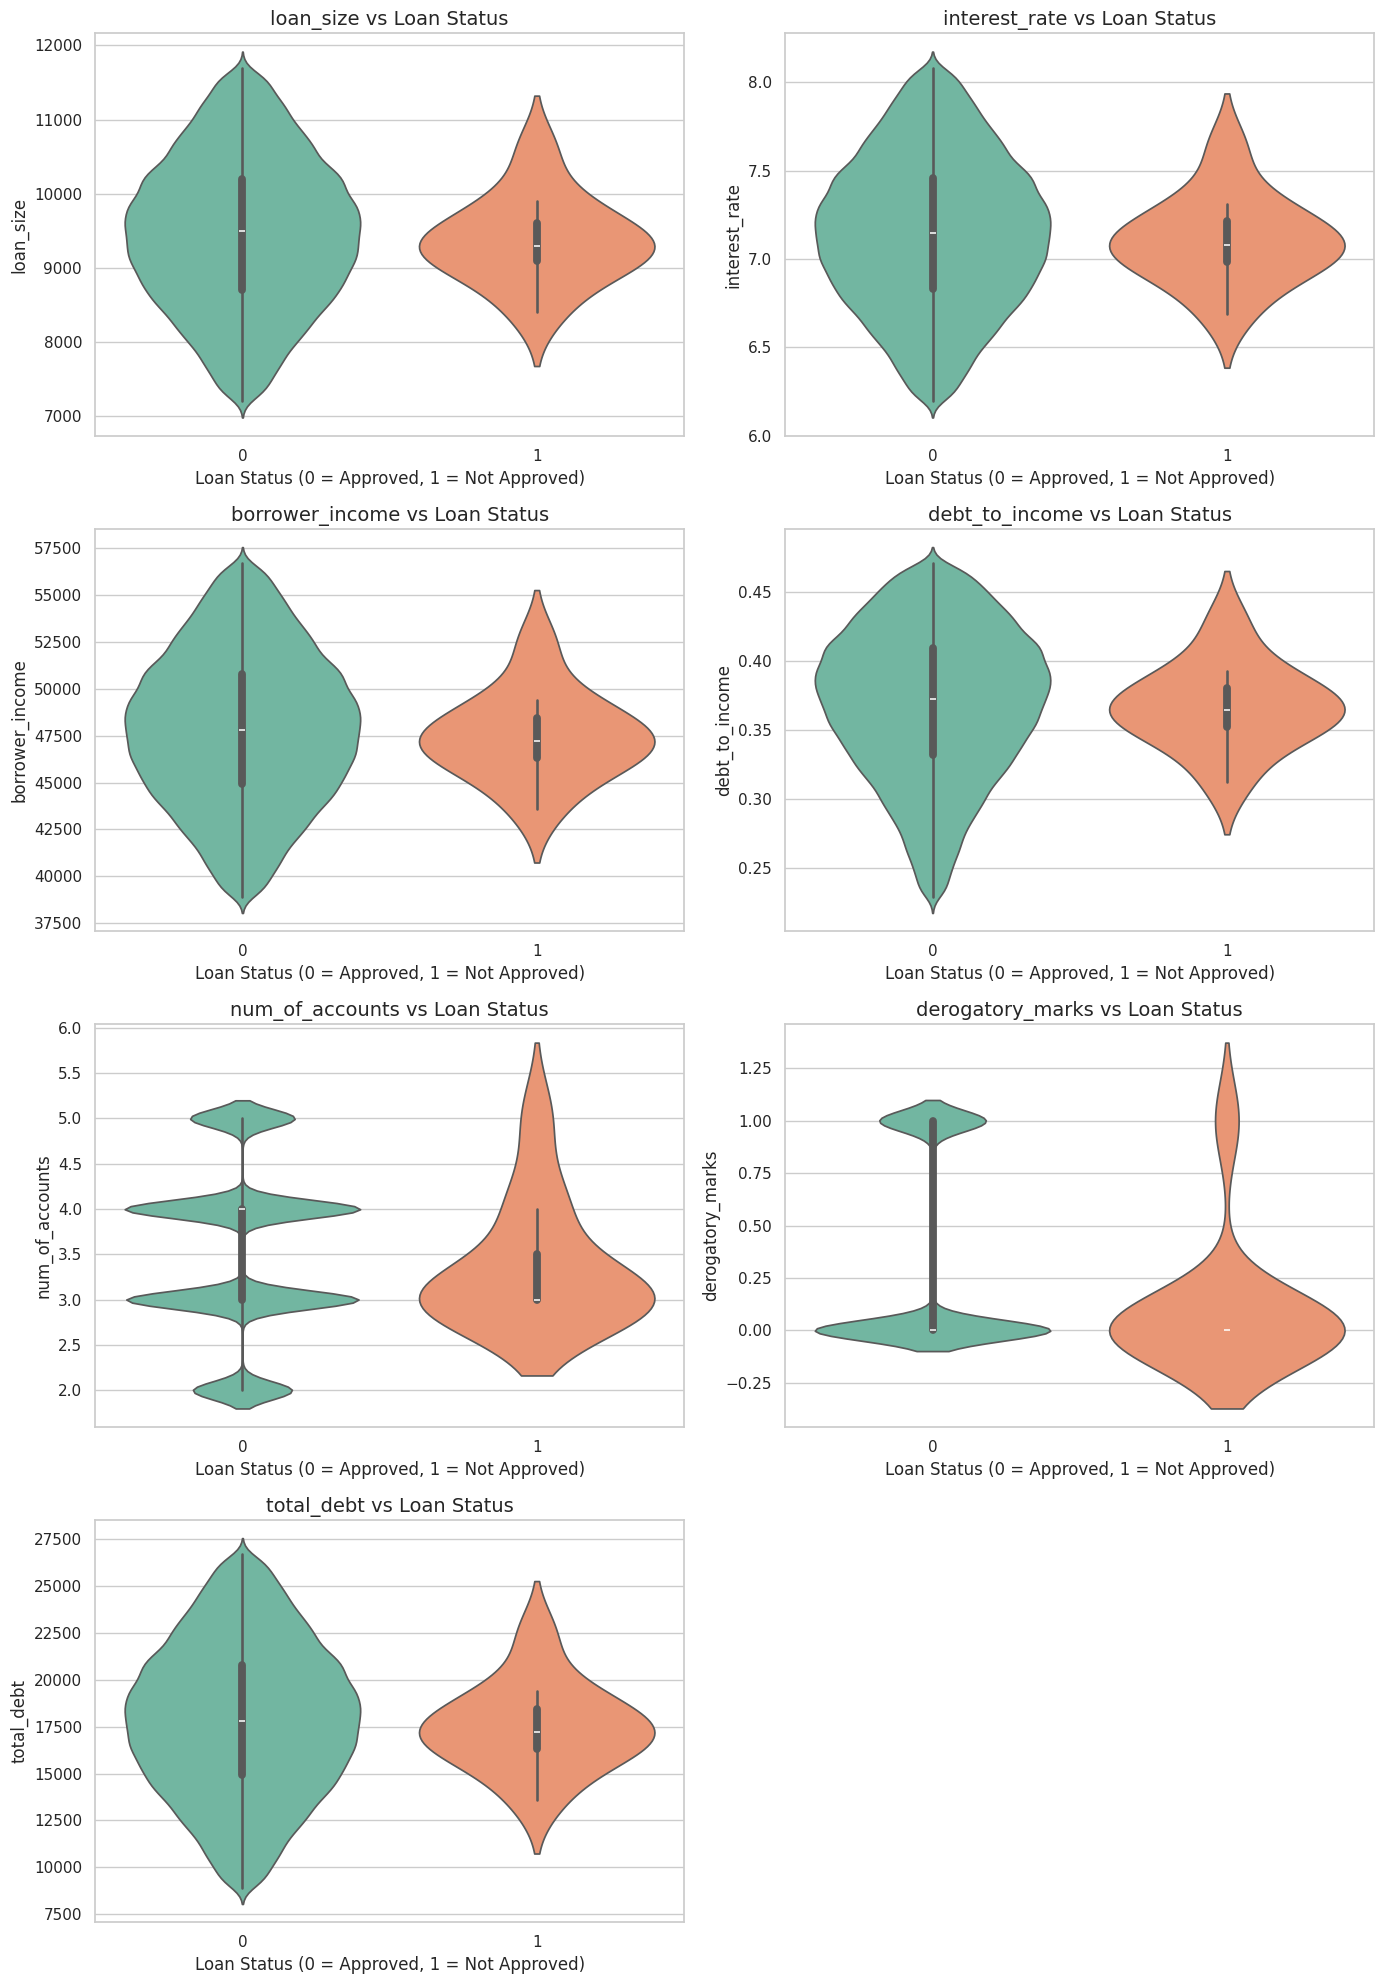

In [ ]:
# Set the plot style
sns.set(style="whitegrid")

# Numeric features to compare
num_cols = [
    'loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
    'num_of_accounts', 'derogatory_marks', 'total_debt'
]

# Set up the plot grid
n = len(num_cols)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
axes = axes.flatten()

# Create a violin plot for each feature against loan_status
for idx, col in enumerate(num_cols):
    sns.violinplot(
        x='loan_status',
        y=col,
        hue='loan_status',
        data=df,
        palette='Set2',
        legend=False,
        ax=axes[idx]
    )
    axes[idx].set_title(f'{col} vs Loan Status', fontsize=14)
    axes[idx].set_xlabel('Loan Status (0 = Approved, 1 = Not Approved)')
    axes[idx].set_ylabel(col)

# Remove any empty subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



#MODEL CREATION AND FITTING THE DATA

#Logistic Regression

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84     11318
           1       0.81      0.91      0.86     11199

    accuracy                           0.85     22517
   macro avg       0.86      0.85      0.85     22517
weighted avg       0.86      0.85      0.85     22517

Confusion Matrix:
 [[ 8979  2339]
 [ 1000 10199]]
Accuracy: 0.851712039792157
ROC AUC: 0.905169919069687


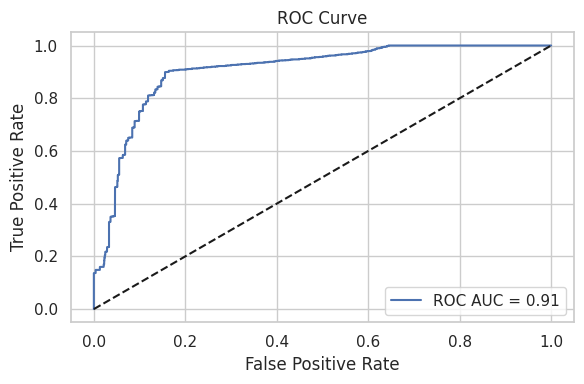

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt


# Step 1: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_balanced)

# Step 2: Handle class imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_balanced), y=y_balanced)
class_weight_dict = dict(zip(np.unique(y_balanced), class_weights))

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

# Step 4: Logistic Regression with cross-validation and regularization
log_reg = LogisticRegressionCV(
    cv=5,
    class_weight=class_weight_dict,
    max_iter=1000,
    penalty='l2',
    scoring='roc_auc',
    random_state=42
)
log_reg.fit(X_train, y_train)

# Step 5: Predictions
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Step 6: Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Step 7: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## RandomForestClassifier model

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     11318
           1       0.97      0.95      0.96     11199

    accuracy                           0.96     22517
   macro avg       0.96      0.96      0.96     22517
weighted avg       0.96      0.96      0.96     22517

Confusion Matrix:
 [[10946   372]
 [  600 10599]]
Accuracy: 0.9568326153572856
ROC AUC: 0.996075799657787


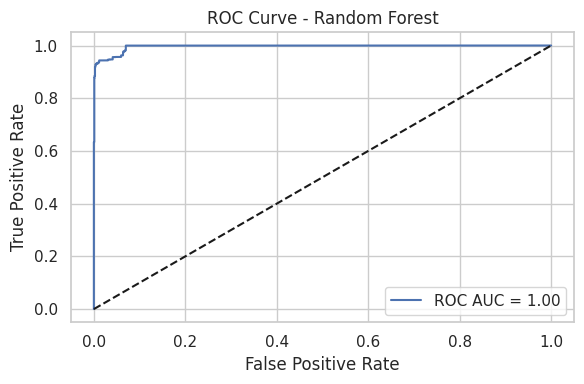

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt


# Feature scaling (optional for RF, but helpful if later comparing with other models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_balanced)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_balanced, test_size=0.2, random_state=42
)

# Train Random Forest with class imbalance handling and regularization
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##XGBoost

In [ ]:
!pip install --upgrade xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 5.7 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [05:30:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     11318
           1       0.99      0.99      0.99     11199

    accuracy                           0.99     22517
   macro avg       0.99      0.99      0.99     22517
weighted avg       0.99      0.99      0.99     22517

Confusion Matrix:
 [[11187   131]
 [  156 11043]]
Accuracy: 0.9872540746991162
ROC AUC: 0.9992906879686468


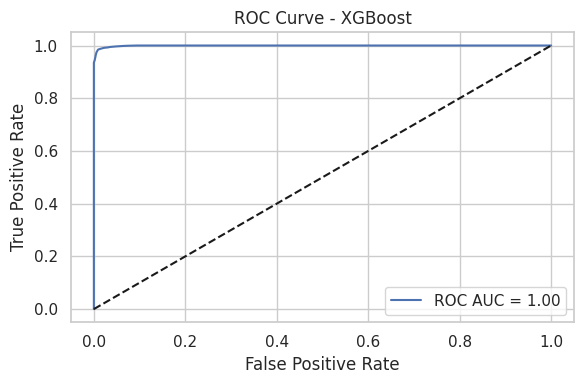

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

X = X_balanced
y = y_balanced

# Scale features (optional, not required for XGBoost but good practice for consistency)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Handle class imbalance: compute scale_pos_weight
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos

# Initialize XGBoost with regularization and imbalance handling
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=scale_pos_weight,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=1000,
    random_state=42
)

# Train with early stopping
# The 'early_stopping_rounds' parameter is moved to the fit method.
# The eval_set parameter is removed as it is already in the fit method
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)], #this parameter is used in fit function to activate early stopping
    verbose=False
)


# Predict
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#DECISION TREE CLASSIFIER

=== Decision Tree Performance ===
Accuracy : 0.9254341164453525
ROC AUC  : 0.9661019215720561

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93     11318
           1       0.92      0.93      0.93     11199

    accuracy                           0.93     22517
   macro avg       0.93      0.93      0.93     22517
weighted avg       0.93      0.93      0.93     22517

Confusion Matrix:
 [[10412   906]
 [  773 10426]]


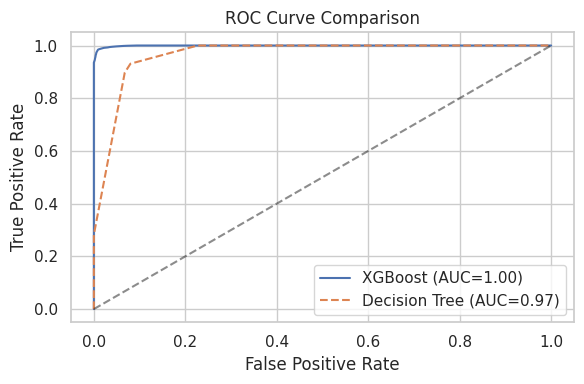

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt

# 1) Initialize a decision‐tree (with class‐weight to handle imbalance)
dt_model = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',   # penalize misclassifying minority
    max_depth=5,               # tune as needed
    min_samples_split=10       # tune as needed
)

# 2) Fitting on the SAME train‐test split you used for XGBoost
dt_model.fit(X_train, y_train)

# 3) Predict & evaluate
y_pred_dt   = dt_model.predict(X_test)
y_proba_dt  = dt_model.predict_proba(X_test)[:, 1]

print("=== Decision Tree Performance ===")
print("Accuracy :", accuracy_score( y_test, y_pred_dt   ))
print("ROC AUC  :", roc_auc_score(y_test, y_proba_dt  ))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# 4) Plot ROC curves together
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba)       # from your XGBoost run
fpr_dt,  tpr_dt,  _ = roc_curve(y_test, y_proba_dt)

plt.figure(figsize=(6, 4), dpi=100)
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={roc_auc_score(y_test, y_proba):.2f})")
plt.plot(fpr_dt,  tpr_dt,  label=f"Decision Tree (AUC={roc_auc_score(y_test, y_proba_dt):.2f})", linestyle='--')
plt.plot([0,1],[0,1], 'k--', alpha=0.5)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


##Comparision of the models

In [ ]:
import pandas as pd
import plotly.express as px

# Prepare the metrics
df_metrics = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.851712039792157, 0.9254341164453525, 0.9568326153572856, 0.9872540746991162],
    'ROC AUC': [0.9051491459403617, 0.9661019215720561, 0.996075799657787, 0.9992906879686468]
})

# Melt DataFrame for Plotly
df_melted = df_metrics.melt(
    id_vars='Model',
    var_name='Metric',
    value_name='Score'
)

# Create interactive grouped bar chart
fig = px.bar(
    df_melted,
    x='Model',
    y='Score',
    color='Metric',
    barmode='group',
    title='Model Performance Comparison'
)

# Annotate bars with values and customize tooltips
fig.update_traces(
    text=df_melted['Score'].round(3),
    textposition='outside',
    hovertemplate='<b>%{x}</b><br>%{legendgroup}: %{y:.3f}'
)

# Layout tweaks
fig.update_layout(
    xaxis_title='',
    yaxis_title='Score',
    uniformtext_minsize=12,
    legend_title_text=''
)

fig.show()
